In [1]:
#!pip install nb_black

In [2]:
#!conda install -c districtdatalabs yellowbrick

### Importing necessary libraries

In [3]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
#from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

<IPython.core.display.Javascript object>

In [4]:
# loading the dataset
data = pd.read_csv("clean_with_air.csv")

<IPython.core.display.Javascript object>

In [5]:
data.shape

(2658, 22)

<IPython.core.display.Javascript object>

* The dataset has 660 rows and 7 columns 

In [6]:
# viewing the first 5 rows of the data
data.head()

Unnamed: 0   Entity  Year   Deaths %  CO2 Emissions  CO2 Emissions Per Cap  \
0           0  Albania  1991  17.613636        4228256                 1.2889   
1           1  Albania  1995  16.789055        2066496                 0.6638   
2           2  Albania  1996  16.588451        1993216                 0.6432   
3           3  Albania  1997  15.081361        1531552                 0.4941   
4           4  Albania  1998  15.965796        1744064                 0.5607   

   Food Emissions  Total GHG  Consumption of Ozone  Shared CO2 Emissions  \
0       4011691.0  9030000.0                   0.0                  0.02   
1       4861321.1  7480000.0                  43.4                  0.01   
2       4569702.9  7280000.0                  43.2                  0.01   
3       4431656.7  6510000.0                  45.2                  0.01   
4       4344061.6  6810000.0                  49.6                  0.01   

   Transport  Death_rate_ambient_ozone_pol  Death_rate_household_air_pol  \
0   500000.0                      4.360865                     98.112348   
1   600000.0                      3.420271                     81.760043   
2   600000.0                      3.079414                     80.923134   
3   500000.0                      3.023884                     76.984826   
4   700000.0                      2.600204                     72.162220   

   Death_rate_all_causes  Death_actual_ozone  Death_actual_particulate  \
0              46.051505           73.711348                949.199276   
1              37.768185           63.413417                828.043002   
2              38.585679           58.832538                858.066586   
3              39.243796           59.782109                898.700084   
4              40.057266           53.195387                943.590146   

   Death_actual_household  Death_under5  Death_5-14  Death_50-69   Death_70+  \
0             2033.148497    172.433312    5.975427   271.661092  512.126572   
1             1792.207903    127.035936    4.580403   240.740486  469.406670   
2             1795.573829    113.537473    4.373679   255.560407  491.357876   
3             1757.484535    105.434149    4.414006   269.448518  521.197486   
4             1691.903067     99.530736    4.493629   280.472022  547.315668   

   Death_15-49  
0    60.714220  
1    49.692924  
2    52.069689  
3    57.988035  
4    64.973478

<IPython.core.display.Javascript object>

In [7]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

In [8]:
# fixing column names
#df.columns = [c.replace(" ", "_") for c in df.columns]

<IPython.core.display.Javascript object>

In [9]:
from sklearn.preprocessing import LabelEncoder

<IPython.core.display.Javascript object>

In [10]:
le = LabelEncoder()
df['Entity'] = le.fit_transform(df['Entity'])

<IPython.core.display.Javascript object>

In [11]:
df.head()

Unnamed: 0  Entity  Year   Deaths %  CO2 Emissions  CO2 Emissions Per Cap  \
0           0       0  1991  17.613636        4228256                 1.2889   
1           1       0  1995  16.789055        2066496                 0.6638   
2           2       0  1996  16.588451        1993216                 0.6432   
3           3       0  1997  15.081361        1531552                 0.4941   
4           4       0  1998  15.965796        1744064                 0.5607   

   Food Emissions  Total GHG  Consumption of Ozone  Shared CO2 Emissions  \
0       4011691.0  9030000.0                   0.0                  0.02   
1       4861321.1  7480000.0                  43.4                  0.01   
2       4569702.9  7280000.0                  43.2                  0.01   
3       4431656.7  6510000.0                  45.2                  0.01   
4       4344061.6  6810000.0                  49.6                  0.01   

   Transport  Death_rate_ambient_ozone_pol  Death_rate_household_air_pol  \
0   500000.0                      4.360865                     98.112348   
1   600000.0                      3.420271                     81.760043   
2   600000.0                      3.079414                     80.923134   
3   500000.0                      3.023884                     76.984826   
4   700000.0                      2.600204                     72.162220   

   Death_rate_all_causes  Death_actual_ozone  Death_actual_particulate  \
0              46.051505           73.711348                949.199276   
1              37.768185           63.413417                828.043002   
2              38.585679           58.832538                858.066586   
3              39.243796           59.782109                898.700084   
4              40.057266           53.195387                943.590146   

   Death_actual_household  Death_under5  Death_5-14  Death_50-69   Death_70+  \
0             2033.148497    172.433312    5.975427   271.661092  512.126572   
1             1792.207903    127.035936    4.580403   240.740486  469.406670   
2             1795.573829    113.537473    4.373679   255.560407  491.357876   
3             1757.484535    105.434149    4.414006   269.448518  521.197486   
4             1691.903067     99.530736    4.493629   280.472022  547.315668   

   Death_15-49  
0    60.714220  
1    49.692924  
2    52.069689  
3    57.988035  
4    64.973478

<IPython.core.display.Javascript object>

In [12]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2658 entries, 0 to 2657
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    2658 non-null   int64  
 1   Entity                        2658 non-null   int32  
 2   Year                          2658 non-null   int64  
 3   Deaths %                      2658 non-null   float64
 4   CO2 Emissions                 2658 non-null   int64  
 5   CO2 Emissions Per Cap         2658 non-null   float64
 6   Food Emissions                2658 non-null   float64
 7   Total GHG                     2658 non-null   float64
 8   Consumption of Ozone          2658 non-null   float64
 9   Shared CO2 Emissions          2658 non-null   float64
 10  Transport                     2658 non-null   float64
 11  Death_rate_ambient_ozone_pol  2658 non-null   float64
 12  Death_rate_household_air_pol  2658 non-null   float64
 13  Dea

<IPython.core.display.Javascript object>

- All the columns in the data are numeric.

In [13]:
# checking for missing values
df.isnull().sum()

Unnamed: 0                      0
Entity                          0
Year                            0
Deaths %                        0
CO2 Emissions                   0
CO2 Emissions Per Cap           0
Food Emissions                  0
Total GHG                       0
Consumption of Ozone            0
Shared CO2 Emissions            0
Transport                       0
Death_rate_ambient_ozone_pol    0
Death_rate_household_air_pol    0
Death_rate_all_causes           0
Death_actual_ozone              0
Death_actual_particulate        0
Death_actual_household          0
Death_under5                    0
Death_5-14                      0
Death_50-69                     0
Death_70+                       0
Death_15-49                     0
dtype: int64

<IPython.core.display.Javascript object>

- There are no missing values in the data.

In [14]:
# checking the number of unique values in each column
data.nunique()

Unnamed: 0                      2658
Entity                           123
Year                              25
Deaths %                        2658
CO2 Emissions                   2654
CO2 Emissions Per Cap           2610
Food Emissions                  2658
Total GHG                       2490
Consumption of Ozone            2183
Shared CO2 Emissions             307
Transport                        677
Death_rate_ambient_ozone_pol    2658
Death_rate_household_air_pol    2658
Death_rate_all_causes           2658
Death_actual_ozone              2658
Death_actual_particulate        2658
Death_actual_household          2658
Death_under5                    2658
Death_5-14                      2658
Death_50-69                     2658
Death_70+                       2658
Death_15-49                     2658
dtype: int64

<IPython.core.display.Javascript object>

In [15]:
df.drop(columns='Unnamed: 0', inplace = True)

<IPython.core.display.Javascript object>

In [16]:
# Let's look at the statistical summary of the data
df.describe().T

count          mean           std  \
Entity                        2658.0  6.154251e+01  3.576569e+01   
Year                          2658.0  2.001939e+03  6.851872e+00   
Deaths %                      2658.0  1.095678e+01  4.780583e+00   
CO2 Emissions                 2658.0  2.059171e+08  7.864747e+08   
CO2 Emissions Per Cap         2658.0  5.292662e+00  7.470072e+00   
Food Emissions                2658.0  1.361511e+08  3.222647e+08   
Total GHG                     2658.0  3.108365e+08  9.218913e+08   
Consumption of Ozone          2658.0  2.281917e+03  1.256261e+04   
Shared CO2 Emissions          2658.0  7.432468e-01  2.768416e+00   
Transport                     2658.0  3.787585e+07  1.623862e+08   
Death_rate_ambient_ozone_pol  2658.0  2.610194e+00  3.810278e+00   
Death_rate_household_air_pol  2658.0  6.472874e+01  7.637952e+01   
Death_rate_all_causes         2658.0  5.597562e+01  3.874377e+01   
Death_actual_ozone            2658.0  2.391026e+03  1.448215e+04   
Death_actual_particulate      2658.0  2.254221e+04  9.644101e+04   
Death_actual_household        2658.0  2.969165e+04  1.286071e+05   
Death_under5                  2658.0  2.337726e+03  9.690352e+03   
Death_5-14                    2658.0  6.369823e+01  2.739048e+02   
Death_50-69                   2658.0  7.784523e+03  3.265510e+04   
Death_70+                     2658.0  1.267880e+04  6.493391e+04   
Death_15-49                   2658.0  2.068488e+03  8.047401e+03   

                                       min           25%           50%  \
Entity                        0.000000e+00  3.000000e+01  6.200000e+01   
Year                          1.990000e+03  1.996000e+03  2.002000e+03   
Deaths %                      9.794958e-01  7.367546e+00  1.116695e+01   
CO2 Emissions                 3.554080e+05  5.428313e+06  2.276068e+07   
CO2 Emissions Per Cap         1.590000e-02  8.168000e-01  2.621750e+00   
Food Emissions                2.817820e+05  9.691225e+06  3.092327e+07   
Total GHG                    -8.526000e+07  2.142000e+07  6.237500e+07   
Consumption of Ozone         -2.980600e+03  2.902500e+01  1.597000e+02   
Shared CO2 Emissions          0.000000e+00  2.000000e-02  8.000000e-02   
Transport                     0.000000e+00  1.600000e+06  4.500000e+06   
Death_rate_ambient_ozone_pol  1.286065e-02  7.632779e-01  1.527693e+00   
Death_rate_household_air_pol  8.842013e-03  2.459975e+00  2.607396e+01   
Death_rate_all_causes         3.113393e+00  2.728519e+01  4.675210e+01   
Death_actual_ozone            1.181741e-01  2.742700e+01  8.410385e+01   
Death_actual_particulate      1.598035e+01  1.127260e+03  3.275722e+03   
Death_actual_household        4.902079e-02  1.928107e+02  1.972634e+03   
Death_under5                  2.077908e-01  3.954556e+01  2.737046e+02   
Death_5-14                    1.595341e-03  1.210528e+00  7.488700e+00   
Death_50-69                   4.067575e+00  3.216772e+02  9.966860e+02   
Death_70+                     7.564145e+00  4.522945e+02  1.558269e+03   
Death_15-49                   6.213201e-01  9.972657e+01  2.881411e+02   

                                       75%           max  
Entity                        9.200000e+01  1.220000e+02  
Year                          2.008000e+03  2.014000e+03  
Deaths %                      1.420090e+01  2.557280e+01  
CO2 Emissions                 9.094405e+07  9.952744e+09  
CO2 Emissions Per Cap         7.029875e+00  6.872400e+01  
Food Emissions                1.118710e+08  2.576316e+09  
Total GHG                     2.065200e+08  1.157095e+10  
Consumption of Ozone          8.324600e+02  2.328622e+05  
Shared CO2 Emissions          3.300000e-01  2.821000e+01  
Transport                     1.807500e+07  1.807700e+09  
Death_rate_ambient_ozone_pol  2.809933e+00  3.219423e+01  
Death_rate_household_air_pol  1.173875e+02  3.215022e+02  
Death_rate_all_causes         7.431530e+01  2.026828e+02  
Death_actual_ozone            3.272021e+02  1.604747e+05  
Death_actual_particu

<IPython.core.display.Javascript object>

## EDA

### Univariate analysis

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [18]:
df.columns

Index(['Entity', 'Year', 'Deaths %', 'CO2 Emissions', 'CO2 Emissions Per Cap',
       'Food Emissions', 'Total GHG', 'Consumption of Ozone',
       'Shared CO2 Emissions', 'Transport', 'Death_rate_ambient_ozone_pol',
       'Death_rate_household_air_pol', 'Death_rate_all_causes',
       'Death_actual_ozone', 'Death_actual_particulate',
       'Death_actual_household', 'Death_under5', 'Death_5-14', 'Death_50-69',
       'Death_70+', 'Death_15-49'],
      dtype='object')

<IPython.core.display.Javascript object>

In [19]:
col = [ 'Year', 'Deaths %', 'CO2 Emissions', 'CO2 Emissions Per Cap',
       'Food Emissions', 'Total GHG', 'Consumption of Ozone',
       'Shared CO2 Emissions', 'Transport', 'Death_rate_ambient_ozone_pol',
       'Death_rate_household_air_pol', 'Death_rate_all_causes',
       'Death_actual_ozone', 'Death_actual_particulate',
       'Death_actual_household', 'Death_under5', 'Death_5-14', 'Death_50-69',
       'Death_70+', 'Death_15-49']

<IPython.core.display.Javascript object>

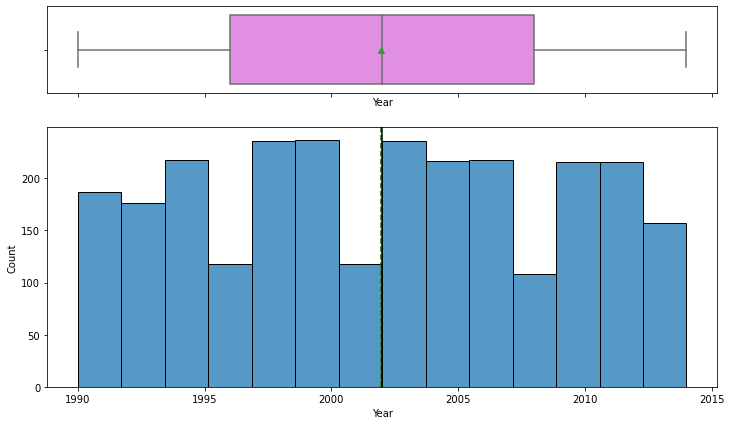

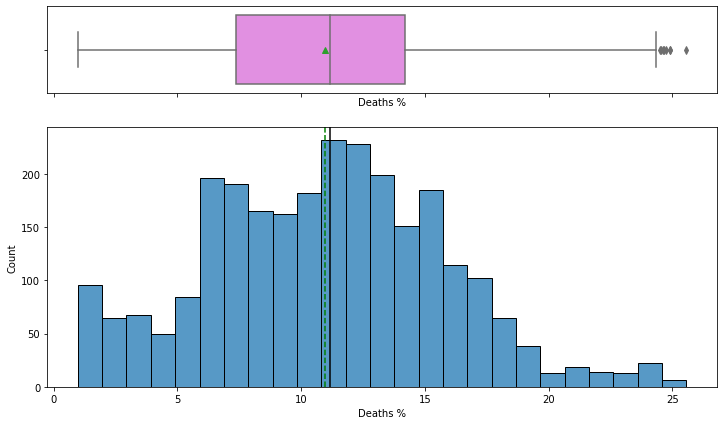

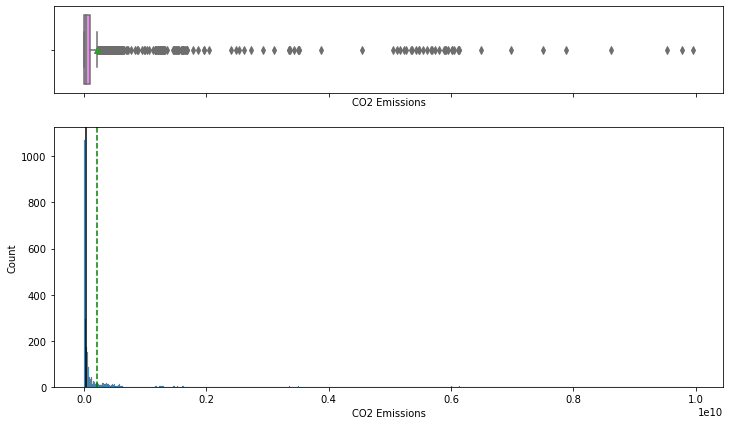

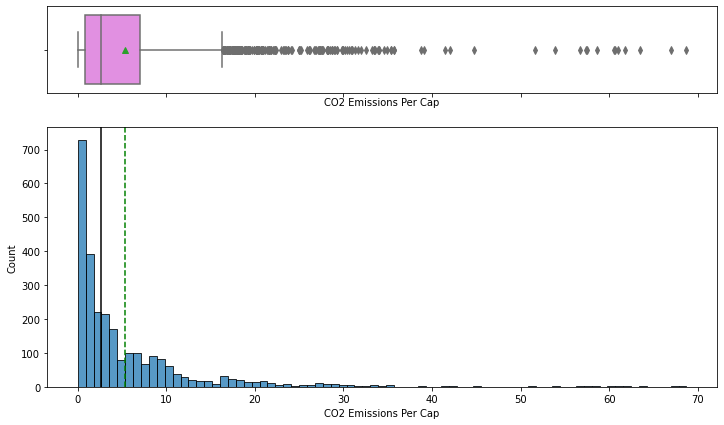

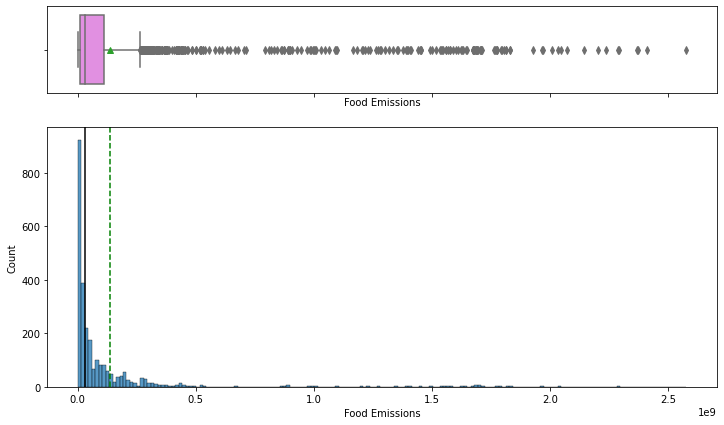

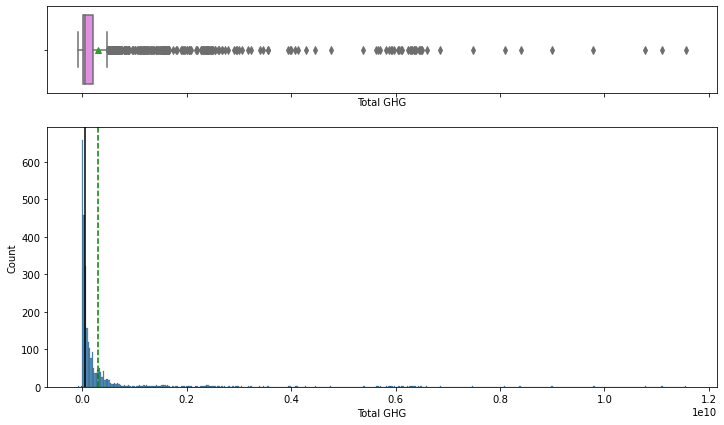

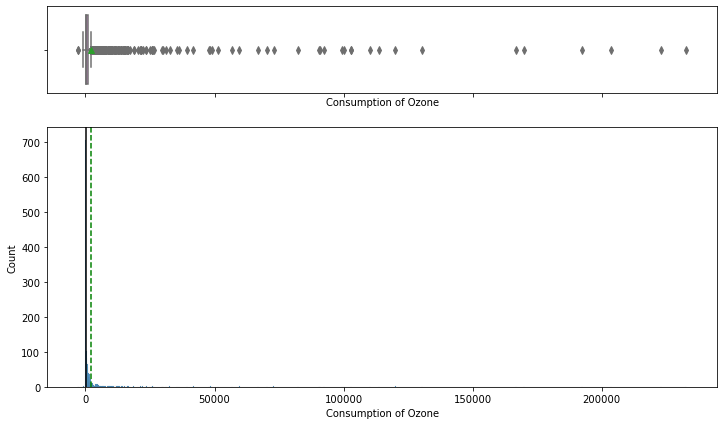

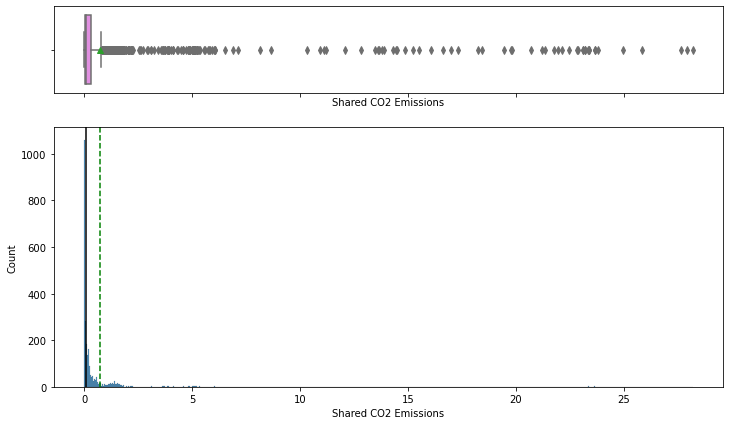

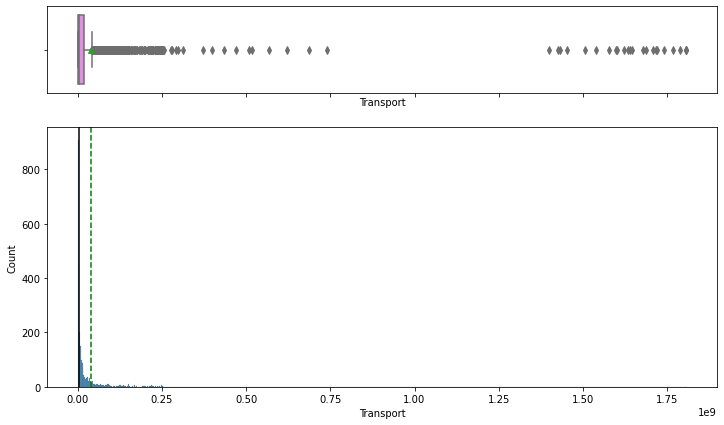

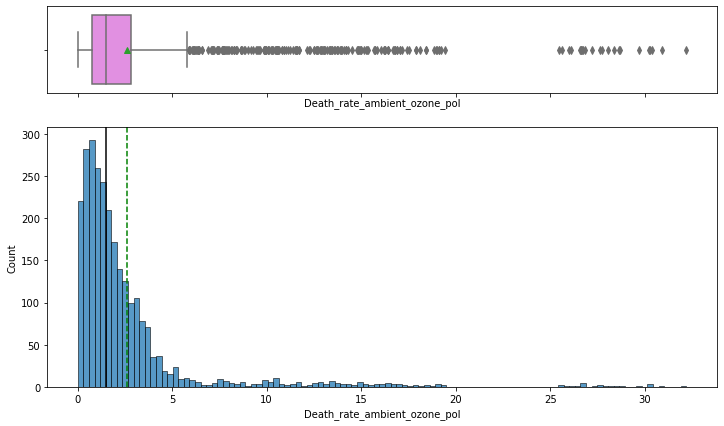

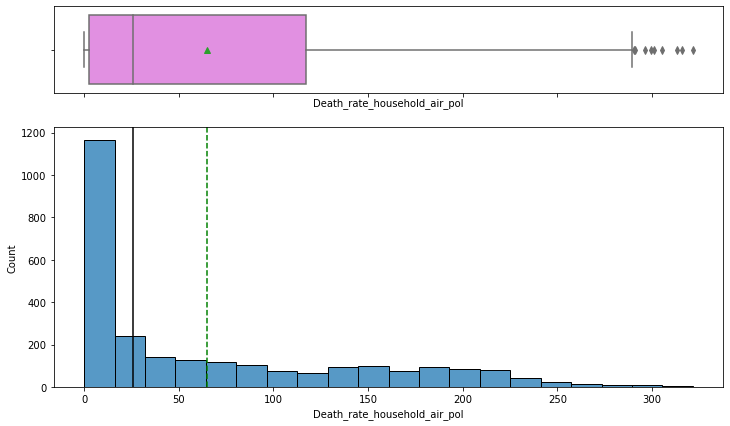

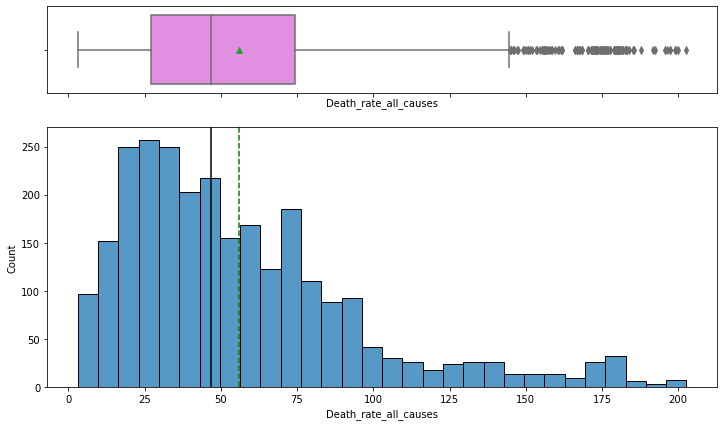

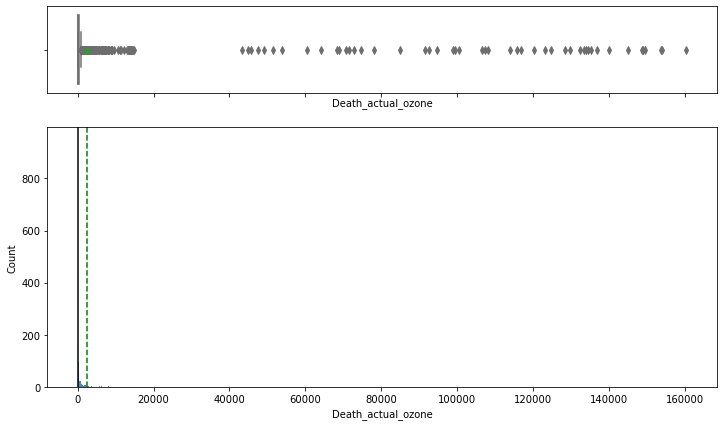

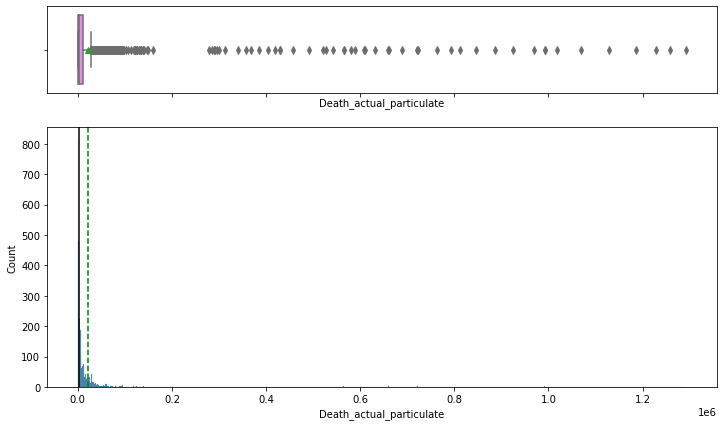

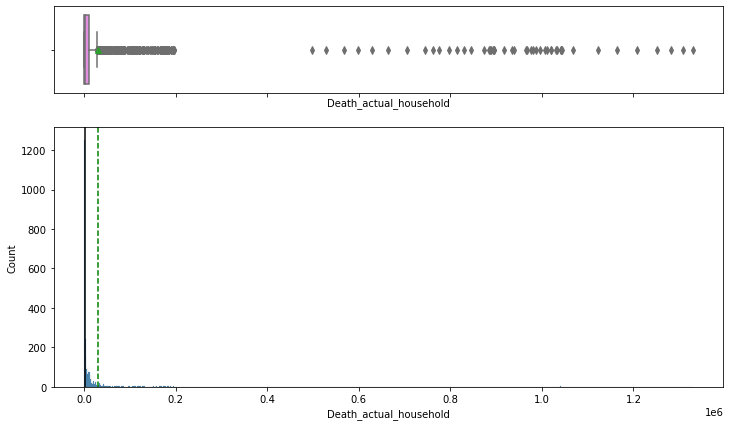

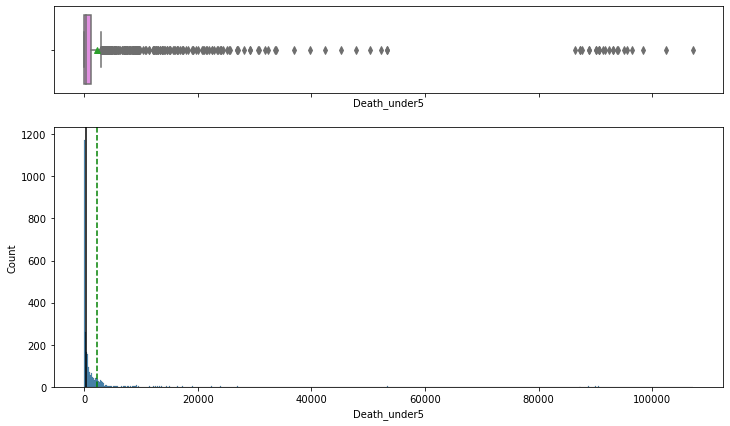

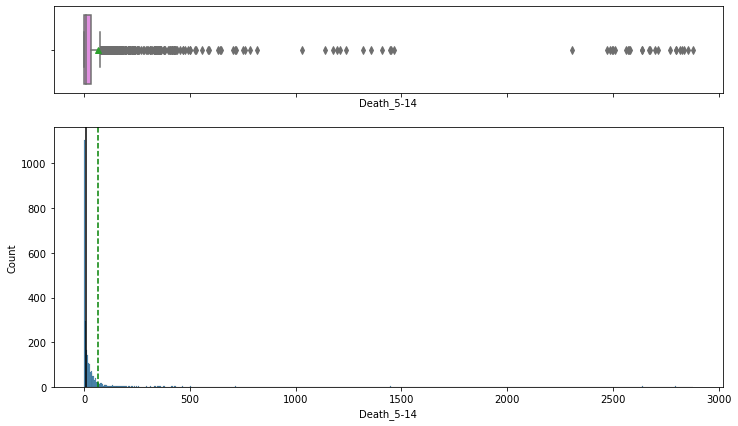

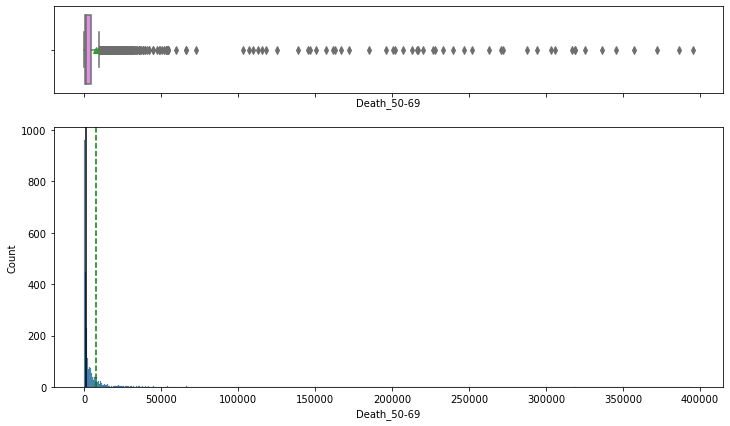

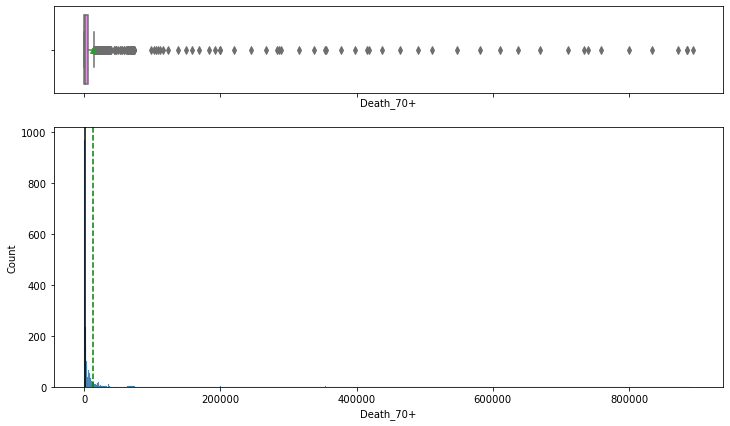

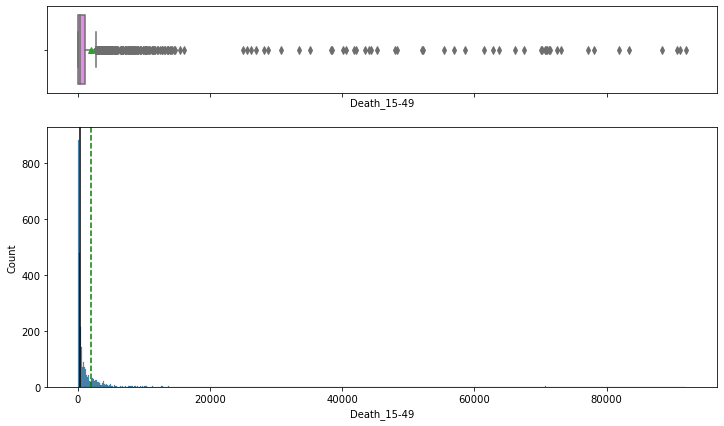

<IPython.core.display.Javascript object>

In [20]:
for i in col:
    histogram_boxplot(data, i)

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

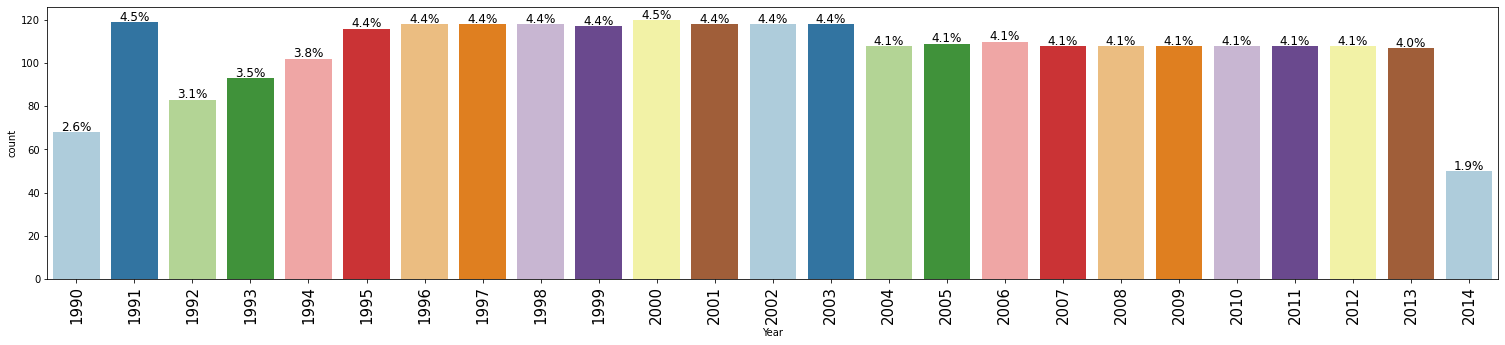

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(df, 'Year', perc=True)

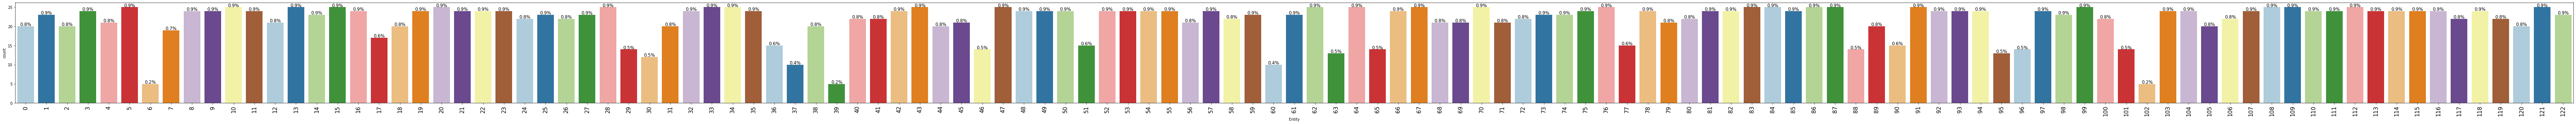

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(df, 'Entity', perc = True)

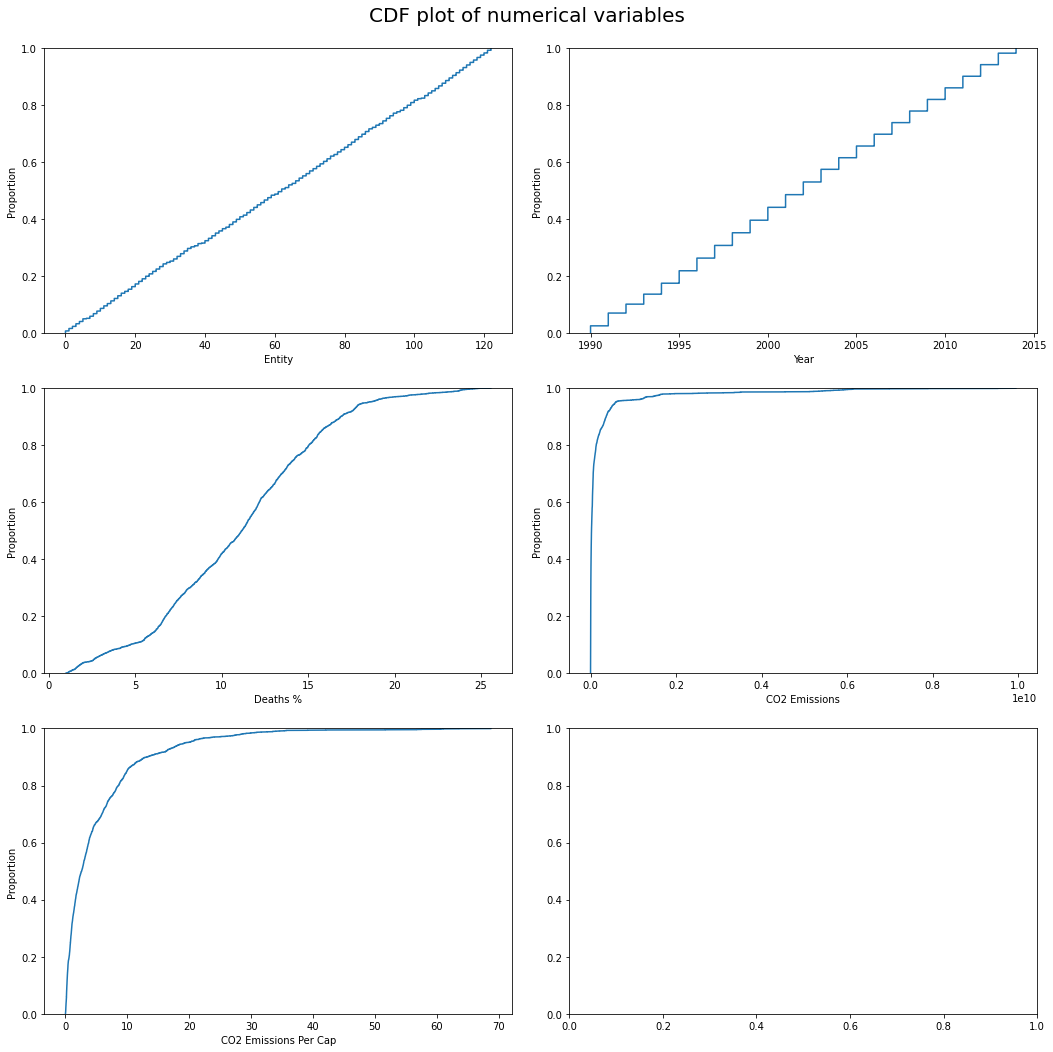

<IPython.core.display.Javascript object>

In [24]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)

counter = 0

for ii in range(3):
    sns.ecdfplot(data=df, ax=axes[ii][0], x=df.columns.tolist()[counter])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(data=df, ax=axes[ii][1], x=df.columns.tolist()[counter])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

### Bivariate Analysis

**Let's check for correlations.**

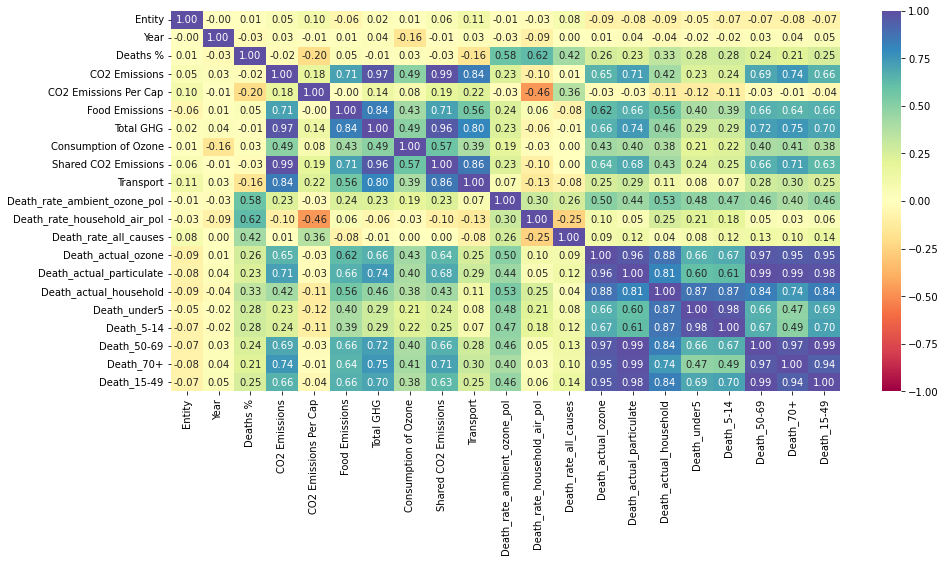

<IPython.core.display.Javascript object>

In [25]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

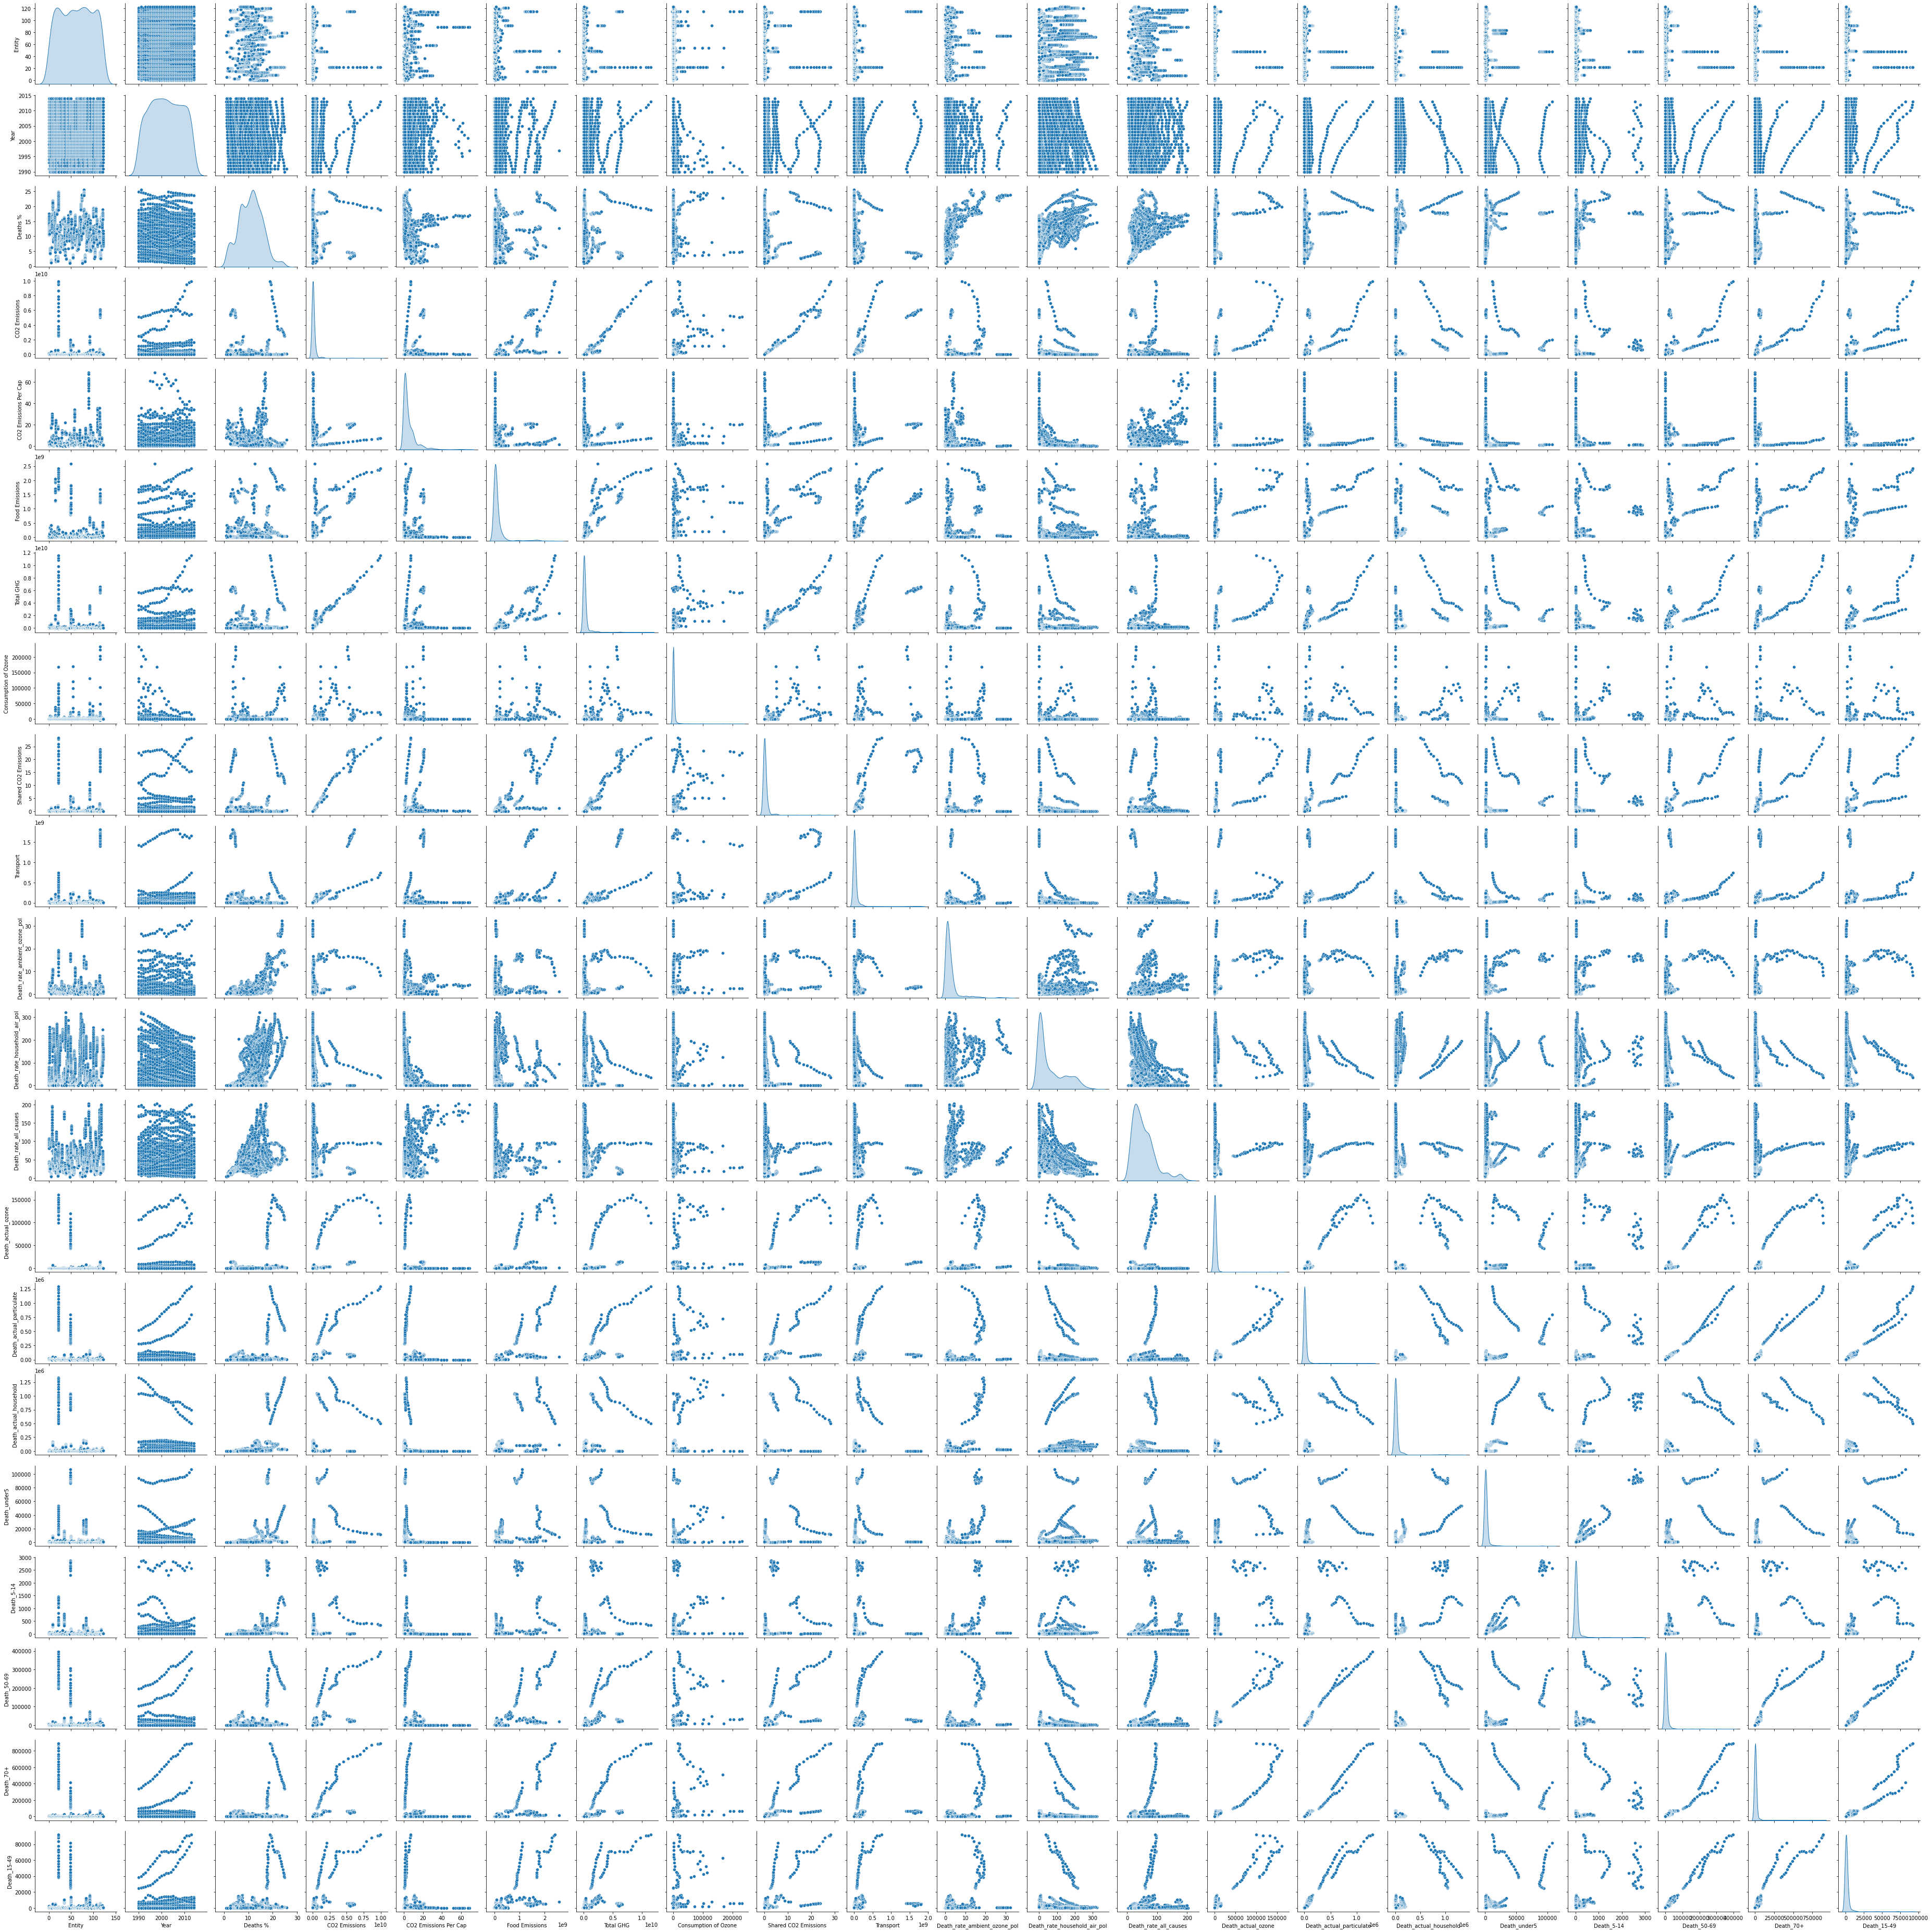

<IPython.core.display.Javascript object>

In [26]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

**Observations**

- There no clear linear correlation between the variables.
- *Total_credit_cards* may have some clusters formed w.r.t other variables.

**We can add a hue and see if we can see some clustered distributions.**

In [27]:
df.columns

Index(['Entity', 'Year', 'Deaths %', 'CO2 Emissions', 'CO2 Emissions Per Cap',
       'Food Emissions', 'Total GHG', 'Consumption of Ozone',
       'Shared CO2 Emissions', 'Transport', 'Death_rate_ambient_ozone_pol',
       'Death_rate_household_air_pol', 'Death_rate_all_causes',
       'Death_actual_ozone', 'Death_actual_particulate',
       'Death_actual_household', 'Death_under5', 'Death_5-14', 'Death_50-69',
       'Death_70+', 'Death_15-49'],
      dtype='object')

<IPython.core.display.Javascript object>


**Let's visualize the modes of contacting the bank in a 3D plot.**

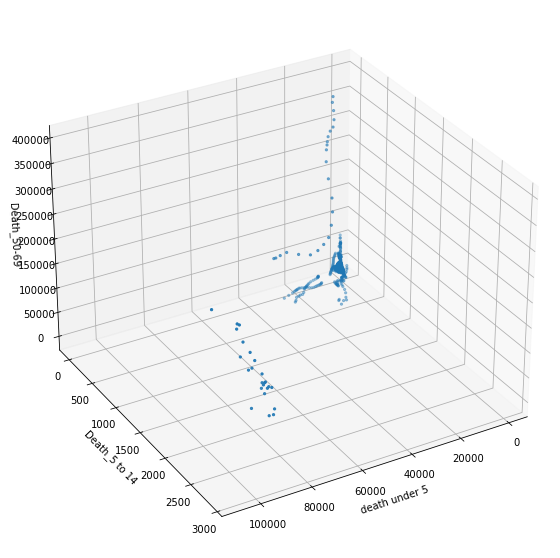

<IPython.core.display.Javascript object>

In [28]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

x = df["Death_under5"]
y = df["Death_5-14"]
z = df["Death_50-69"]


ax.scatter(x, y, z, marker=".")
ax.set_xlabel("death under 5")
ax.set_ylabel("Death_5 to 14")
ax.set_zlabel("Death_50-69")
ax.view_init(azim=60)
plt.show()

## Data Preprocessing

### Outlier Detection

- Let's find outliers in the data using z-score with a threshold of 3.

In [29]:
threshold = 3
outlier = {}
for j in  col:
    i = df[j]
    mean = np.mean(df[j])
    std = np.std(df[j])
    list1 = []
    for v in i:
        z = (v - mean) / std
        if z > threshold:
            list1.append(v)
    list1.sort()
    outlier[i.name] = list1

print("The following are the outliers in the data:")
for key, value in outlier.items():
    print("\n", key, ":", value)

The following are the outliers in the data:

 Year : []

 Deaths % : [25.57280488508813]

 CO2 Emissions : [2606096182, 2730787587, 2921650956, 3100002045, 3350340129, 3357908888, 3360455433, 3439152210, 3503233703, 3510169286, 3514933795, 3872595297, 4545013886, 5057930940, 5113454675, 5167480847, 5223754656, 5267343060, 5338698344, 5358824048, 5421502465, 5474256770, 5478209686, 5540173478, 5610581589, 5675786435, 5686464995, 5731049595, 5804668919, 5876555340, 5904881595, 5914077766, 5946770566, 6010508353, 6011837495, 6051668046, 6114006880, 6131004158, 6134521473, 6488803816, 6978611952, 7496832207, 7886532768, 8616652695, 9528555734, 9775621803, 9952743755]

 CO2 Emissions Per Cap : [27.7159, 28.1345, 28.1578, 28.2602, 28.2776, 28.2784, 28.4539, 28.6615, 28.6794, 28.6798, 28.9894, 29.0605, 29.2559, 29.2666, 29.8381, 29.8831, 29.902, 29.9274, 30.171, 30.457, 30.681, 30.8237, 30.9183, 30.9853, 31.3478, 31.6447, 31.9664, 32.5625, 33.2825, 33.4163, 33.4769, 33.5469, 33.8752, 33.993, 

<IPython.core.display.Javascript object>

**Observations**

- There are outliers in the columns *Avg_Credit_Limit* and *Total_Visits_online*.
- We will not treat the outliers as most of those outliers are not disjoint from the curve (continues curve).
- These outliers might also form their own cluster.

### Scaling

- Let's scale the data before we proceed with clustering.

In [30]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df.copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [31]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

## K-means Clustering

In [32]:
k_means_df = subset_scaled_df.copy()

<IPython.core.display.Javascript object>

Number of Clusters: 1 	Average Distortion: 3.177358398240109
Number of Clusters: 2 	Average Distortion: 2.890876948229744
Number of Clusters: 3 	Average Distortion: 2.766341280527628
Number of Clusters: 4 	Average Distortion: 2.5105308255607084
Number of Clusters: 5 	Average Distortion: 2.4313965490238587
Number of Clusters: 6 	Average Distortion: 2.2884331730313052
Number of Clusters: 7 	Average Distortion: 2.2167590194574407
Number of Clusters: 8 	Average Distortion: 2.1324428507014823


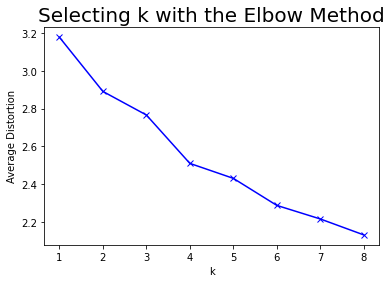

<IPython.core.display.Javascript object>

In [33]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

**The appropriate value of k from the Elbow curve seems to be 2 or 3.**

In [34]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

<IPython.core.display.Javascript object>

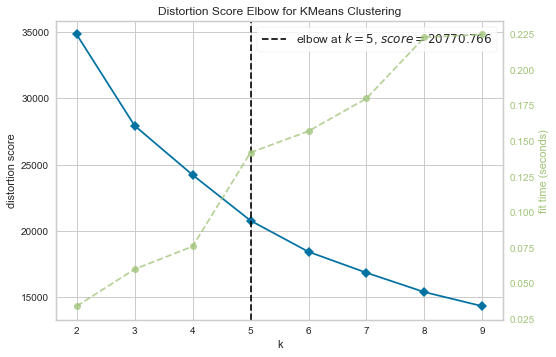

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

<IPython.core.display.Javascript object>

In [35]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**Let's check the silhouette scores.**

In [36]:
sil_score = []
cluster_list = range(2, 10)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.8217600139195157)
For n_clusters = 3, the silhouette score is 0.7839037932866935)
For n_clusters = 4, the silhouette score is 0.2049396691636206)
For n_clusters = 5, the silhouette score is 0.20737360803000737)
For n_clusters = 6, the silhouette score is 0.22747197441603972)
For n_clusters = 7, the silhouette score is 0.2436574523283212)
For n_clusters = 8, the silhouette score is 0.2360906149897641)
For n_clusters = 9, the silhouette score is 0.19395897018279526)


<IPython.core.display.Javascript object>

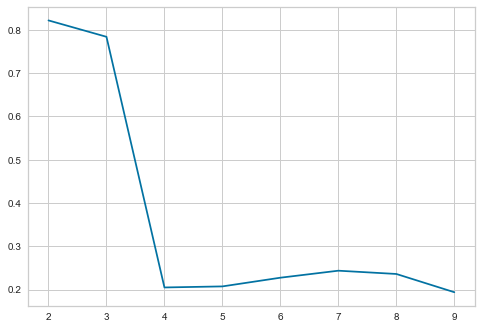

<IPython.core.display.Javascript object>

In [37]:
plt.plot(cluster_list, sil_score)
plt.show()

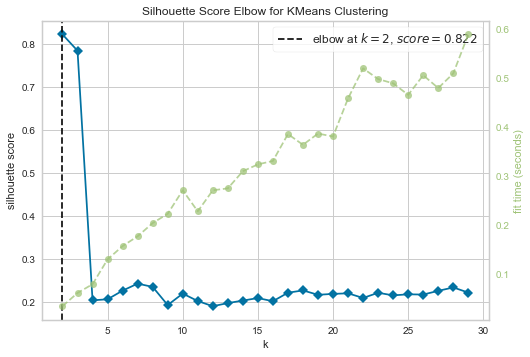

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

<IPython.core.display.Javascript object>

In [38]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 30), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**From the silhouette scores, it seems that 3 is a good value for k.**

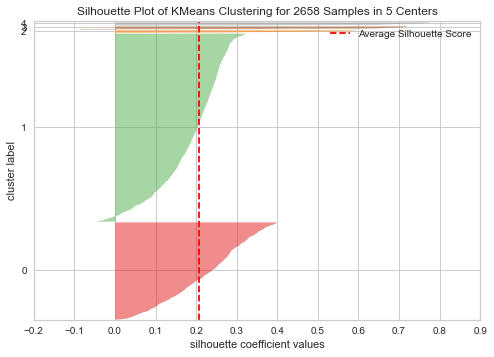

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2658 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [39]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

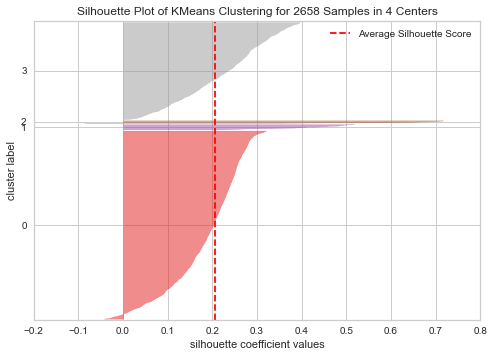

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2658 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [40]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

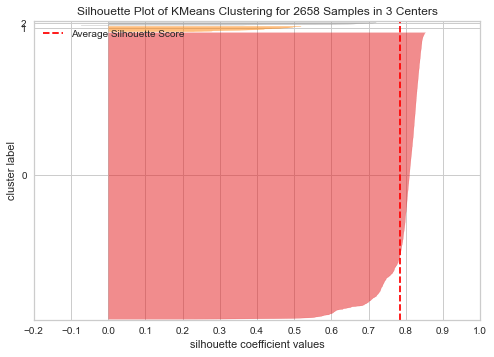

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2658 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [41]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

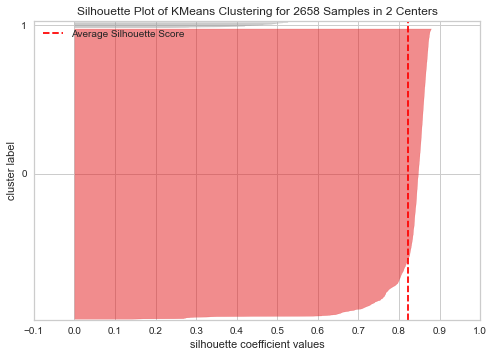

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2658 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [42]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

**Observations**

- The silhouette coefficient for 3 clusters is the highest.
- We can also see that the score for 3 clusters is close to the average score and the shape of the clusters is very uniform in SilhouetteVisualizer, even though the magnitude may be different.
- So, we will proceed with 3 clusters.

In [43]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(k_means_df)

KMeans(n_clusters=3, random_state=0)

<IPython.core.display.Javascript object>

In [44]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["K_means_segments"] = kmeans.labels_
df1["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

## Hierarchical Clustering

In [45]:
hc_df = subset_scaled_df.copy()

<IPython.core.display.Javascript object>

In [46]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9462022961330424.
Cophenetic correlation for Euclidean distance and complete linkage is 0.9330118297209815.
Cophenetic correlation for Euclidean distance and average linkage is 0.9552859394058372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.9284159865274038.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9294830927898472.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.867532859475925.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9068421944407665.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9079394278152675.


ValueError: The condensed distance matrix must contain only finite values.

<IPython.core.display.Javascript object>

In [47]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9552859394058372, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

**Let's explore different linkage methods with Euclidean distance only.**

In [48]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9462022961330424.
Cophenetic correlation for complete linkage is 0.9330118297209815.
Cophenetic correlation for average linkage is 0.9552859394058372.
Cophenetic correlation for centroid linkage is 0.9551654474738887.
Cophenetic correlation for ward linkage is 0.7540009179385354.
Cophenetic correlation for weighted linkage is 0.9284159865274038.


<IPython.core.display.Javascript object>

In [49]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print()
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)


Highest cophenetic correlation is 0.9552859394058372, which is obtained with average linkage.


<IPython.core.display.Javascript object>

**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**


**Let's view the dendrograms for the different linkage methods.**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Dendrogram with average linkage shows distinct and separate cluster tree.**

In [ ]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

**Let's move ahead with 3 clusters, Euclidean distance, and average linkage.**

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
HCmodel.fit(hc_df)

In [ ]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

In [ ]:
hc_df.head()

In [ ]:
df2.head()

In [48]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling and Comparison

### Cluster Profiling: K-means Clustering

In [49]:
km_cluster_profile = df1.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [50]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [51]:
km_cluster_profile

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
K_means_segments                                                            
0                     33782.383420            5.515544           3.489637   
1                     12174.107143            2.410714           0.933036   
2                    141040.000000            8.740000           0.600000   

                  Total_visits_online  Total_calls_made  count_in_each_segment  
K_means_segments                                                                
0                            0.981865          2.000000                    386  
1                            3.553571          6.870536                    224  
2                           10.900000          1.080000                     50

<IPython.core.display.Javascript object>

### Cluster Profiling: Hierarchical Clustering

In [52]:
hc_cluster_profile = df2.groupby("HC_segments").mean()

<IPython.core.display.Javascript object>

In [53]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [54]:
hc_cluster_profile

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
HC_segments                                                            
0                33713.178295            5.511628           3.485788   
1               141040.000000            8.740000           0.600000   
2                12197.309417            2.403587           0.928251   

             Total_visits_online  Total_calls_made  count_in_each_segment  
HC_segments                                                                
0                       0.984496          2.005168                    387  
1                      10.900000          1.080000                     50  
2                       3.560538          6.883408                    223

<IPython.core.display.Javascript object>

### K-Means Clustering vs Hierarchical Clustering Comparison

In [55]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

<IPython.core.display.Javascript object>

In [56]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='K_means_segments'>

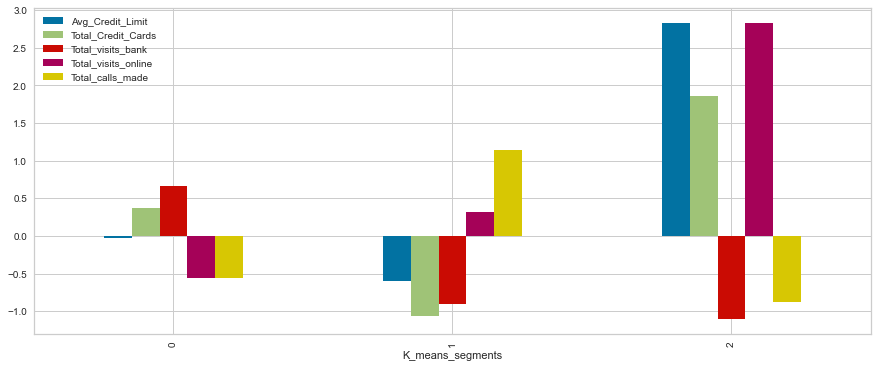

<IPython.core.display.Javascript object>

In [57]:
k_means_df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

<AxesSubplot:xlabel='HC_segments'>

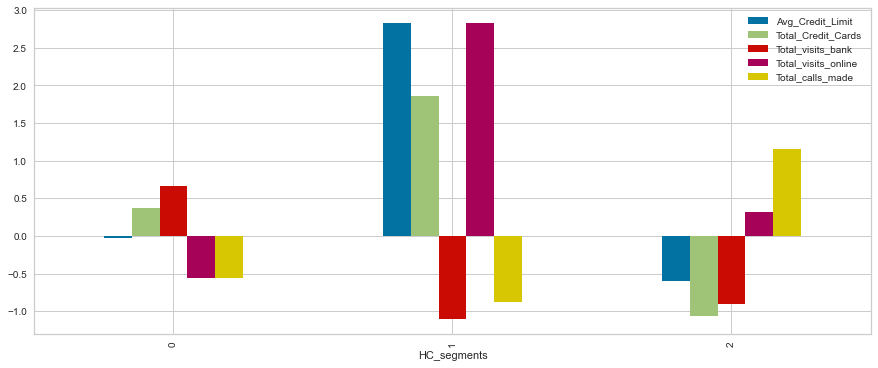

<IPython.core.display.Javascript object>

In [58]:
hc_df.groupby("HC_segments").mean().plot.bar(figsize=(15, 6))

**Looks like the K-Means and Hierarchical clusters are the same except that the labels are swapped between clusters 1 and 2.**


**Let's swap the labels for K-Means for better analysis and comparison.**

In [59]:
k_means_df.loc[k_means_df["K_means_segments"] == 1, "K_means_segments"] = 3
k_means_df.loc[k_means_df["K_means_segments"] == 2, "K_means_segments"] = 1
k_means_df.loc[k_means_df["K_means_segments"] == 3, "K_means_segments"] = 2
df1["K_means_segments"] = k_means_df["K_means_segments"]

km_cluster_profile = df1.groupby("K_means_segments").mean()
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [60]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='K_means_segments'>

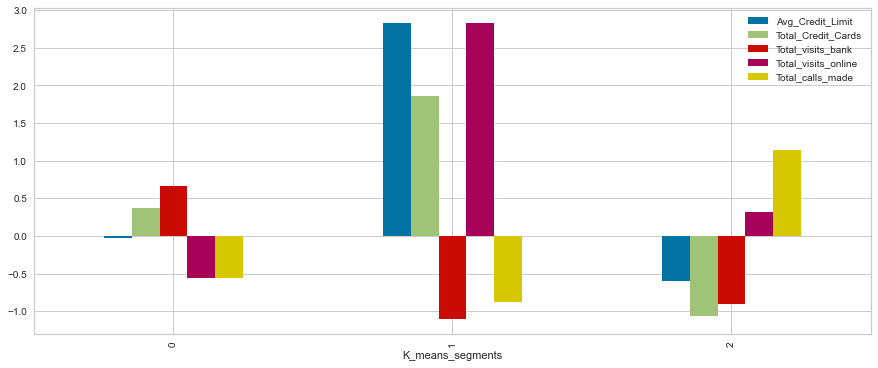

<IPython.core.display.Javascript object>

In [61]:
k_means_df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

**Observations**

- The online user segment matches for both K-means and Hierarchical Clustering techniques.
- There is a clear distinction between customers who prefer online banking vs others.
- Online users have more credit cards and a larger credit limit, which is beneficial for the bank with respect to the revenue and cutting the costs of manual engagement with the customers.

**Let's create some plots on the original data to understand the customer distribution among the clusters.**

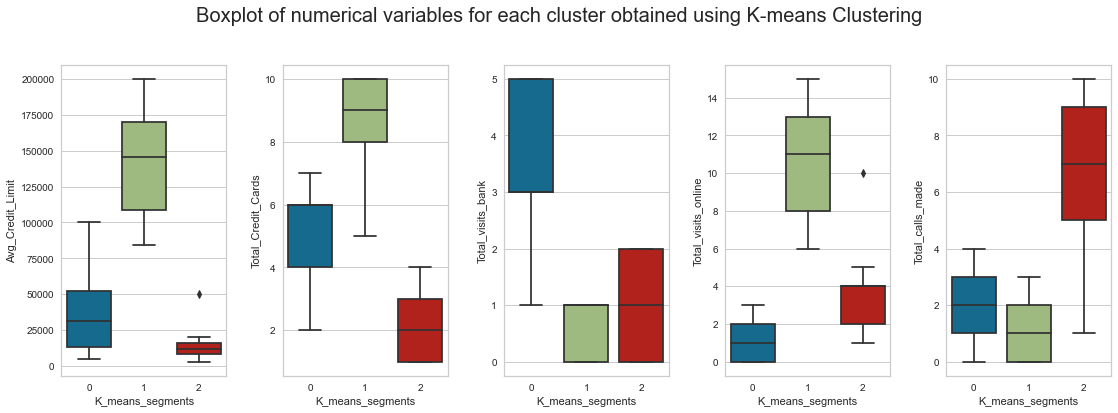

<IPython.core.display.Javascript object>

In [62]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster obtained using K-means Clustering",
    fontsize=20,
)

counter = 0

for ii in range(5):
    sns.boxplot(
        ax=axes[ii], y=df1[df1.columns[counter]], x=k_means_df["K_means_segments"]
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

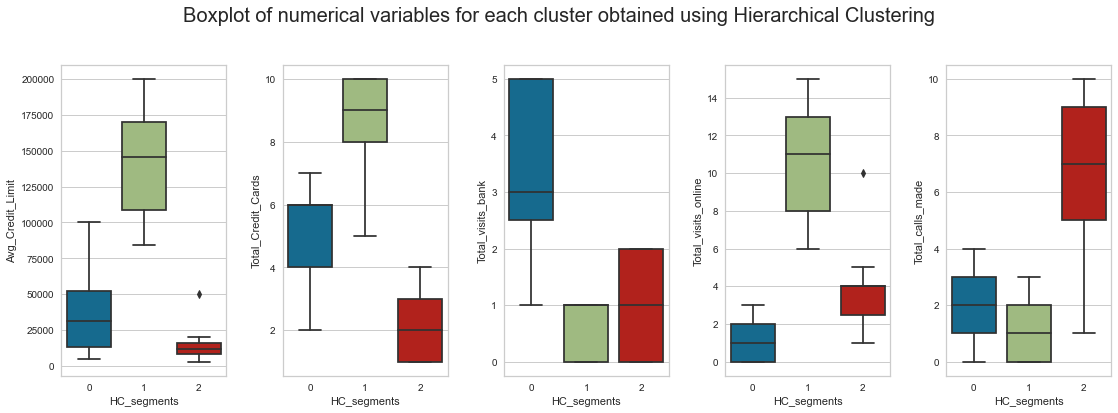

<IPython.core.display.Javascript object>

In [63]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster obtained using Hierarchical Clustering",
    fontsize=20,
)

counter = 0

for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df2[df2.columns[counter]], x=hc_df["HC_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

### Cluster Comparison

**Cluster 0:**

- Close to 60% of the customers are in this group.
- This cluster has the second-highest credit limit and number of credit cards.
- Customers in this group prefer to visit the bank for their banking needs than doing business online or over the phone. Total visits to be bank are ranging between 1 and 5, but most of them are skewed to the left.
- There is almost equal distribution of phone bankers and online bankers in this cluster. Some of the customers have never visited online, while the highest number of online visits is 3. Some customers have never made any phone banking
- This may be the bank's second-best cluster as there are more cards and credit limits than cluster 1.


**Cluster 1:**

- There are very few customers in this segment (only around 7%).
- This cluster seems to be a premium cluster with the highest average credit limit and the highest number of credit cards.
- Average credit limit for this group is between 85000 and 200000 dollars, with an average of ~141000 dollars.
- Total credit cards are between 5 and 10 with a tail on the left, but most customers are within the 8 to 10 range.
- Customers in this group prefer online banking, with an even distribution of 6 to 15 visits.
- Customers in this group have the lowest phone calls made and visits to the bank, with some customers never making any phone calls and some never visiting the bank.


**Cluster 2:**

- Around 1/3rd of the customers are in this cluster.
- This cluster has the lowest number of credit cards, ranging from 1 to 4.
- This cluster has the lowest average credit limit and most of them are below 2500 dollars with an outlier of around 5000 dollars.
- The total number of calls made by this segment of customers is the highest among all the clusters and ranges between 1 and 10.
- Customers in this segment have the lowest online visits, ranging from 1 to 5 with an outlier of 10 visits.

## Insights

- We have seen that 3 clusters are distinctly formed using both methodologies and the clusters are analogous to each other.
- Cluster 1 has premium customers with a high credit limit and more credit cards, indicating that they have more purchasing power. The customers in this group have a preference for online banking.
- Cluster 0 has customers who prefer to visit the bank for their banking needs than doing business online or over the phone. They have an average credit limit and a moderate number of credit cards.
- Cluster 2 has more overhead of customers calling in, and the bank may need to spend money on call centers.


## Business Recommendations

- The premium customers of Cluster 1 have the potential to add more revenue to the bank, and the bank should run incentives to draw more customers of this kind. The bank can also run promotions and offer discounts for paperless billing and online banking to drive more customers into this group.
- Cluster 0 has customers who prefer to visit the bank for their banking needs than doing business online or over the phone. They have an average credit limit and number of credit cards. The bank can increase their revenue by focusing on the volume of customers in Cluster 0.
- Since the Cluster 2 customers prefer to use phone banking, the bank can invest in automating the phone banking so that the overhead can be reduced. Phone banking can also be expanded to chat applications like WhatsApp and Telegram.
- Bank should invest in making online banking more easier and secure. It should also run a campaign on the security and convenience feature of online banking.

## Add-on: Cluster Overlapping

C:\Software\Anaconda\lib\site-packages\seaborn\distributions.py:1182: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\Software\Anaconda\lib\site-packages\seaborn\distributions.py:1182: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\Software\Anaconda\lib\site-packages\seaborn\distributions.py:1182: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


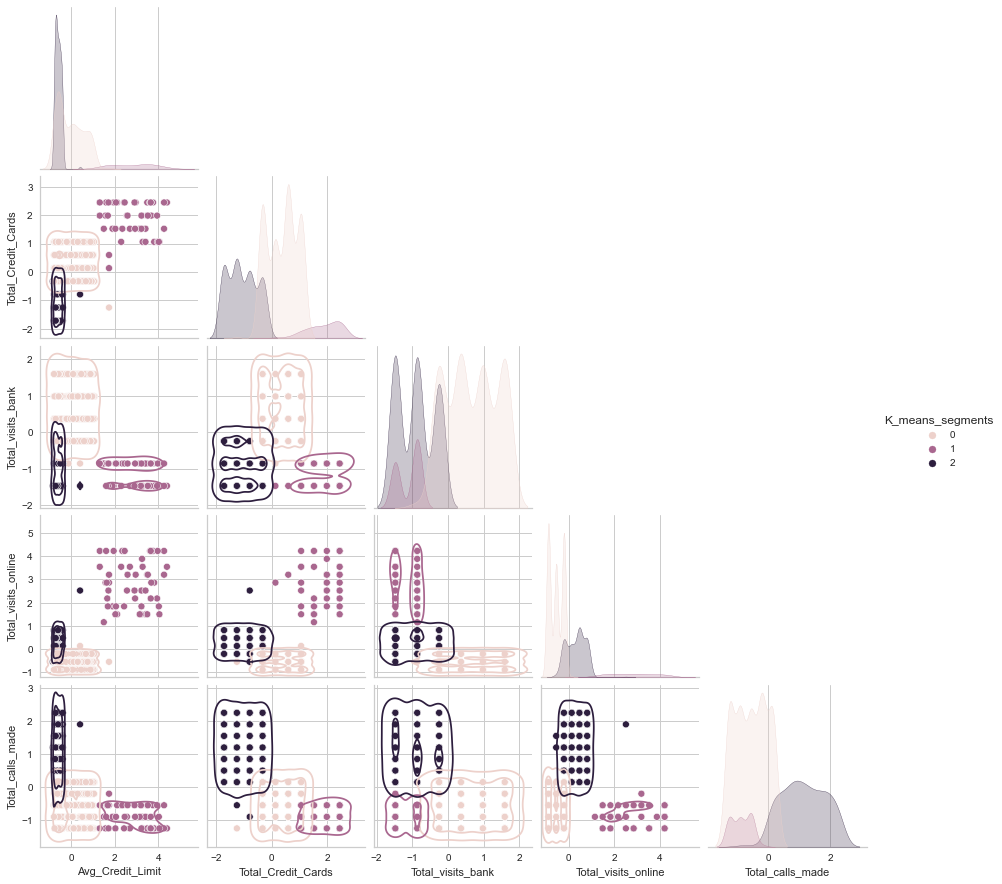

<IPython.core.display.Javascript object>

In [64]:
# let's see if there is any overlap in the clusters
g = sns.pairplot(
    k_means_df[
        [
            "Avg_Credit_Limit",
            "Total_Credit_Cards",
            "Total_visits_bank",
            "Total_visits_online",
            "Total_calls_made",
            "K_means_segments",
        ]
    ],
    diag_kind="kde",
    corner=True,
    hue="K_means_segments",
)
g.map_lower(sns.kdeplot, levels=3, color=".2")
plt.show()

**Observations**

- We can see that Cluster 1 is more clearly separated compared to Cluster 0 and Cluster 2 and that there is an overlap between Cluster 0 and Cluster 2.
- Cluster 2 has some customers whose behavior is a little different from the rest of the group.
- We can see that in Cluster 2 when the average credit limit and the number of credit cards is low, total calls made are high, and this is the opposite in the case of Cluster 1.
- We can see a clear correlation between a higher average credit limit and more number of cards in Cluster 1.